##  Importing necessary libraries


In [ ]:
import numpy
import matplotlib 
import matplotlib.pyplot as plt
import random




Creating the student regresson function that will provide the trained model based on provided training parameters

In [ ]:
def studentReg(ages_train, net_worths_train):

  #importing the LinearRegression module+
  from sklearn.linear_model import LinearRegression
  #Creating an object of Linear Regression and fitting it to the training data
  reg=LinearRegression().fit(ages_train,net_worths_train)
  #Returning the trained model
  return reg

In [ ]:

#random() function is used to generate random numbers in Python
#Seed is used in the generation of a pseudo-random encryption key.
#Also seed function is used to generate same random numbers again and again and 
#simplifies algorithm testing process.
random.seed(42)
numpy.random.seed(42)

ages = []
#Creating empty list to store random ages generated
for ii in range(250):
  ages.append( random.randint(18,75) )
  #Filling the empty list with random integers between 18 and 75.

#scale : [float or array_like]Standard Derivation of the distribution. 
#Generating net_worth by multiplying with 6.25 taking it as slope
net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
#for each element in ages list using the equation y=mx+c
### need massage list into a 2d numpy array to get it to work in LinearRegression
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

#train_test_split is a function in Sklearn model selection for splitting data 
#arrays into two subsets: for training data and for testing data. 
#With this function, you don't need to divide the dataset manually.
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

#Passing training data to my Linear regression model
reg1 = studentReg(ages_train, net_worths_train)

#Checking slope and intercept of the trained model
print("Coefficient",reg1.coef_)
print("intercept",reg1.intercept_)

#Calculating efficiency. It internally calculates y_pred again and gives the 
#efficiency

print("Testing data",reg1.score(ages_test, net_worths_test))
print("Training data",reg1.score(ages_train, net_worths_train))
#Checking Score of the model




Coefficient [[6.35919214]]
intercept [-8.54049985]
Testing data 0.9003307037173851
Training data 0.8817363122358516


## Original Regression plot based on Training data (Best Fit Line)

Using the regplot function on seaborn library to visualize how the best fit line looks based on training data

Text(0.5, 1.0, 'Regression Plot')

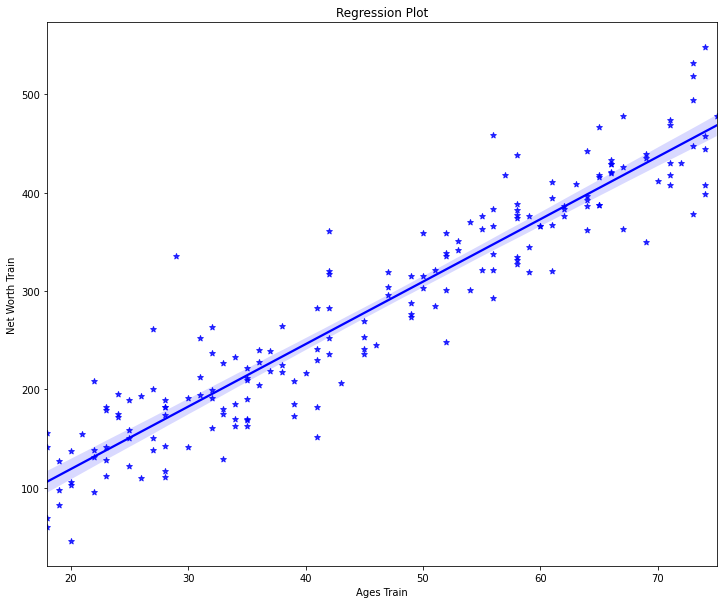

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.regplot(x=ages_train,y=net_worths_train,scatter=True,color='blue',marker='*')
plt.xlabel("Ages Train")
plt.ylabel("Net Worth Train")
plt.title("Regression Plot")


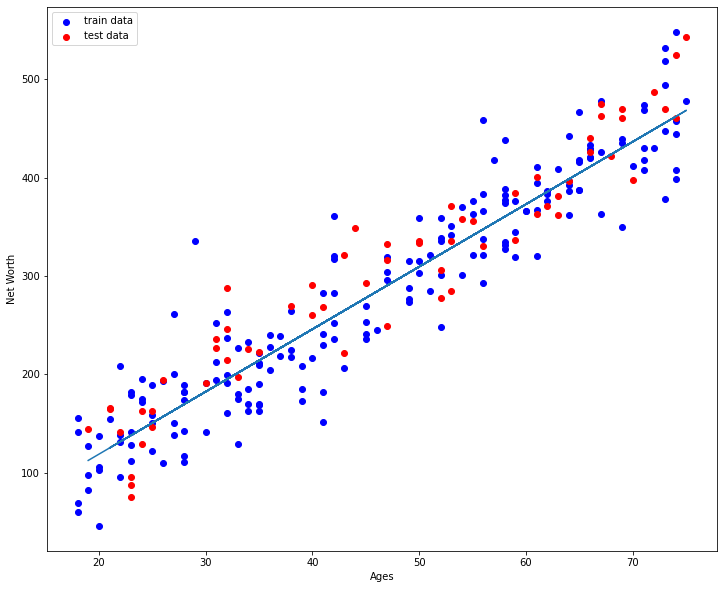

In [ ]:
#Plotting graph using matplotlib.
plt.figure(figsize=(12,10))
#Increasing figure size to(12,10) figsize is generally represented by a tuple.
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
#Scatterplot of Training data with blue colour and labelled "train data"
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
#Scatterplot of Testing data with red colour and labelled "test data"
plt.plot(ages_test,reg1.predict(ages_test))
#plotting the predicted test data based on test ages
plt.xlabel("Ages")
#labelling x axis
plt.ylabel("Net Worth")
#labelling y axis
plt.legend(loc=2)
#using a legend
plt.show()
#show function to display the visualization
